<a href="https://colab.research.google.com/github/zakyzuf/2141720173-machine-learning-2023/blob/main/Pertemuan%209-Perceptron%20dan%20ANN/Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas
<ul>
<li>Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN</li>
<li>Anda diperbolehkan melakukan eksplorasi terhadap,</li>
<ul><li>Metode pra pengolahan</li>
<li>Pemilihan fitur</li>
<li>Arsitektur ANN</li>
<li>Fungsi Aktiviasi</li></ul>
<li>ANN diimplementasikan dengan menggunakan tensorflow.</li>
<li><B>DIKERJAKAN SECARA BERKELOMPOK</li>
<li>JELASKAN HASIL YANG ANDA DAPATKAN,</li>
<ul><li>AKURASI</li>
<li>CONFUSION MATRIX</li>
<li>KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN</li></ul>
</ul>

## Pra Pengolahan Data

### Langkah 1 - Import Library

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.datasets import mnist

### Langkah 2 - Load Data

In [28]:
# Memuat data MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Langkah 3 - Pengecekan Data MINST

In [29]:
# Menghitung jumlah data keseluruhan
total_data = len(y_train)
print(f"Jumlah data keseluruhan: {total_data}")

# Menghitung jumlah data MNIST untuk setiap label
label_counts = np.bincount(y_train)
for label, count in enumerate(label_counts):
    print(f"Jumlah data dengan label {label}: {count}")

# Menampilkan dimensi data
data_shape = x_train[0].shape
print(f"Dimensi data: {data_shape}")

Jumlah data keseluruhan: 60000
Jumlah data dengan label 0: 5923
Jumlah data dengan label 1: 6742
Jumlah data dengan label 2: 5958
Jumlah data dengan label 3: 6131
Jumlah data dengan label 4: 5842
Jumlah data dengan label 5: 5421
Jumlah data dengan label 6: 5918
Jumlah data dengan label 7: 6265
Jumlah data dengan label 8: 5851
Jumlah data dengan label 9: 5949
Dimensi data: (28, 28)


### Langkah 4 - Normalisasi Data

In [30]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Langkah 5 - Mengubah Bentuk Data

In [31]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

### Langkah 6 - Split Data

In [32]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Membuat Model ANN

### Langkah 1 - Inisiasi Model ANN

In [33]:
ann = tf.keras.models.Sequential()

### Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [34]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3 - Membuat Hidden Layer Kedua

In [35]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Langkah 4 - Membuat Output Layer

In [36]:
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Training Model

### Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [39]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

### Langkah 2 - Fitting Model

In [40]:
ann.fit(X_train, y_train, epochs=10, batch_size=256, shuffle=True)

Epoch 1/10
188/188 [==============================] - 9s 47ms/step - loss: 0.4539 - accuracy: 0.8738
Epoch 2/10
188/188 [==============================] - 7s 39ms/step - loss: 0.1780 - accuracy: 0.9482
Epoch 3/10
188/188 [==============================] - 7s 35ms/step - loss: 0.1301 - accuracy: 0.9630
Epoch 4/10
188/188 [==============================] - 7s 39ms/step - loss: 0.1024 - accuracy: 0.9700
Epoch 5/10
188/188 [==============================] - 7s 37ms/step - loss: 0.0822 - accuracy: 0.9762
Epoch 6/10
188/188 [==============================] - 7s 35ms/step - loss: 0.0682 - accuracy: 0.9800
Epoch 7/10
188/188 [==============================] - 7s 39ms/step - loss: 0.0572 - accuracy: 0.9835
Epoch 8/10
188/188 [==============================] - 6s 34ms/step - loss: 0.0476 - accuracy: 0.9864
Epoch 9/10
188/188 [==============================] - 7s 39ms/step - loss: 0.0412 - accuracy: 0.9882
Epoch 10/10
188/188 [==============================] - 6s 34ms/step - loss: 0.0342 - accura

In [44]:
test_loss, test_acc = ann.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

y_pred = np.argmax(ann.predict(x_test), axis=-1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


313/313 - 4s - loss: 0.0758 - accuracy: 0.9762 - 4s/epoch - 12ms/step

Test accuracy: 0.9761999845504761
313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 966    2    4    0    0    2    4    1    1    0]
 [   0 1123    4    1    0    1    2    0    4    0]
 [   1    1 1019    2    1    0    1    3    4    0]
 [   0    0    9  983    0    4    0    2    8    4]
 [   2    0    5    0  960    1    1    1    2   10]
 [   2    0    0   10    1  869    3    1    4    2]
 [   6    2    1    1    2   12  931    0    3    0]
 [   0    5   16    1    0    0    0  992    3   11]
 [   3    1    7    6    1    5    2    2  945    2]
 [   1    3    1    5    9    6    1    3    6  974]]


### Visualisasi Confusion Matrix dalam Heatmap

Akurasi: 0.9762


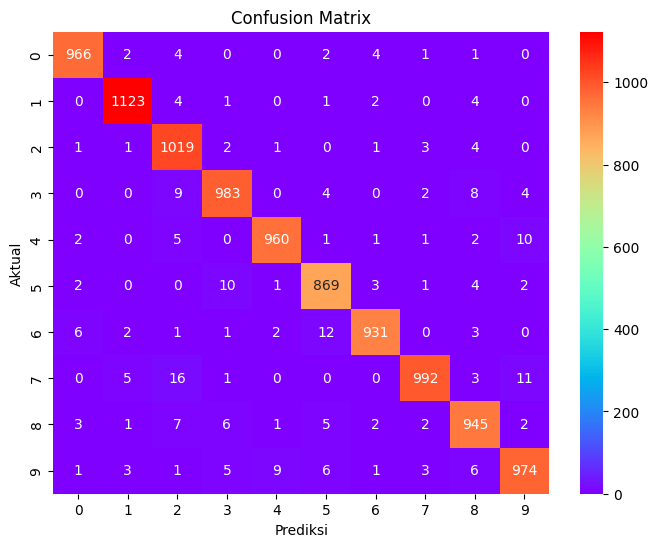

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='rainbow', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### Visualisasi Hasil Prediksi

313/313 [==============================] - 1s 4ms/step


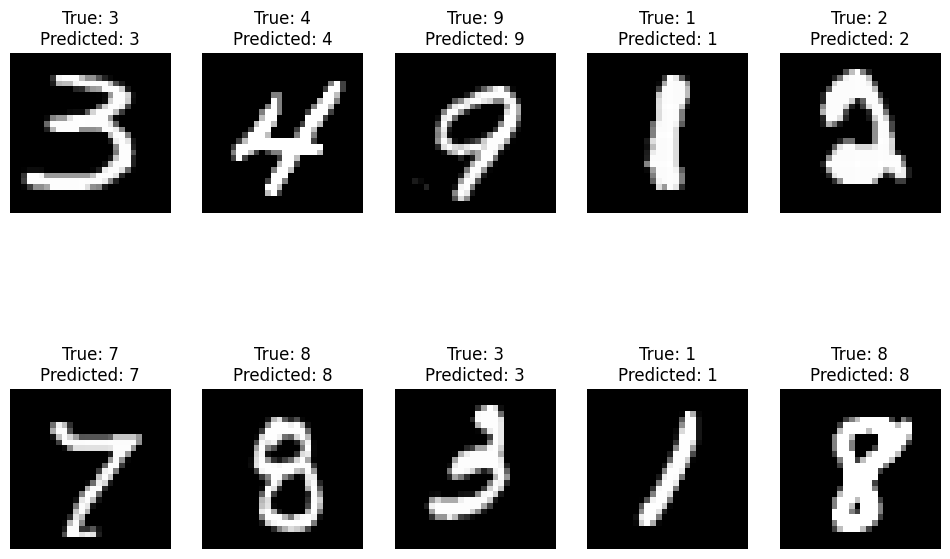

In [50]:
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)

original_images = x_test[random_indices].reshape(-1, 28, 28)
true_labels = y_test[random_indices]
predictions = ann.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[random_indices[i]]}")
    plt.axis('off')
plt.show()
